### Import libraries and Read the data

In [34]:
import pandas as pd
import numpy as np
df = pd.read_excel('AfterCleaning.xlsx')

### Identify the Independent and Dependent data

In [35]:

df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

df['independent total'] = df.filter(like='%GR').sum(axis=1)
df['dependent total'] = df[['A1FI2020',
'A1FI2050',
'A1FI2080',
'A2A2020',
'A2A2050',
'A2A2080',
'A2B2020',
'A2B2050',
'A2B2080',
'A2C2020',
'A2C2050',
'A2C2080',
'B1A2020',
'B1A2050',
'B1A2080',
'B2A2020',
'B2A2050',
'B2A2080',
'B2B2020',
'B2B2050',
'B2B2080']].sum(axis=1)



### Classification

In [36]:
mid_value = df['dependent total'].median()
df['Class'] = df['dependent total'].apply(lambda x: 2 if x > mid_value else 1)

<Axes: xlabel='independent total', ylabel='dependent total'>

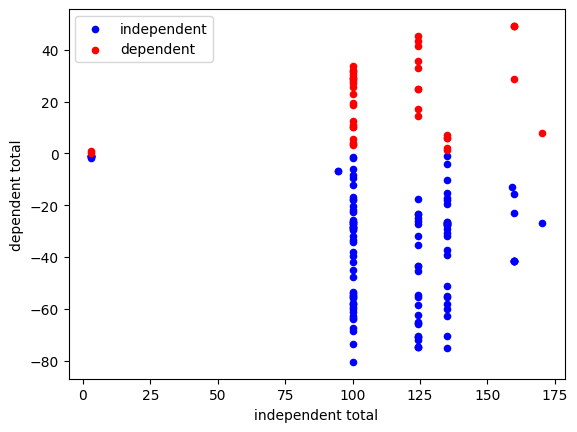

In [37]:
independent_df=df[df['dependent total']<0][0:]
dependent_df=df[df['dependent total']>0][0:]

axes = independent_df.plot(kind='scatter', x='independent total', y='dependent total', color='blue', label='independent')
dependent_df.plot(kind='scatter', x='independent total', y='dependent total', color='red', label='dependent', ax=axes)

### Split the data for training and testing

In [38]:
# Independent variable
x = np.asarray(df['dependent total'])
# dependent variable
y = np.asarray(df['Class'])


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
# (132, 2)
x_train.shape
# (132,)
y_train.shape
# (33, 2)
x_test.shape
# (33,)
y_test.shape

(34,)

### Reshape the data and modeling

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

if x_train.ndim == 1:
    x_train = x_train.reshape(-1, 1)
if x_test.ndim == 1:
    x_test = x_test.reshape(-1, 1)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid.fit(x_train_scaled, y_train)

print(grid.best_params_)

y_predict = grid.predict(x_test_scaled)

scores = cross_val_score(grid.best_estimator_, x_train_scaled, y_train, cv=5)
print(f"Accuracy: {scores.mean()} (+/- {scores.std()})")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, k

[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................

### Evaluation

In [41]:
from sklearn import svm
from sklearn.metrics import classification_report, precision_score


print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


if x_train.ndim == 1:
    x_train = x_train.reshape(-1, 1)
if x_test.ndim == 1:
    x_test = x_test.reshape(-1, 1)


classifier = svm.SVC(kernel='linear', gamma='auto', C=2, class_weight='balanced')
classifier.fit(x_train, y_train)

y_predict = classifier.predict(x_test)

precision = precision_score(y_test, y_predict, zero_division=0)
print(f"Precision: {precision}")

print(classification_report(y_test, y_predict, zero_division=0))



x_train shape: (132, 1)
x_test shape: (34, 1)
Precision: 1.0
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.92      0.96        24

    accuracy                           0.94        34
   macro avg       0.92      0.96      0.93        34
weighted avg       0.95      0.94      0.94        34

